# Linear Regression with Python
Equation of linear regression<br>
$y = c + m_1x_1 + m_2x_2 + ... + m_nx_n$

-  $y$ is the response
-  $c$ is the intercept
-  $m_1$ is the coefficient for the first feature
-  $m_n$ is the coefficient for the nth feature<br>

In our case:

$y = c + m_1 \times TV$

The $m$ values are called the model **coefficients** or **model parameters**.

---

# Task-2
### In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied.
## Steps:
- Import Libraries
- Read the Data
- Data Preprocessing
- Train-Test Split
- Creating and Training the Model
- Predictions
- Residual Analysis
- Evaluating the model

**Let's get started!**

### Import Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns  
import matplotlib.pyplot as plt  
%matplotlib inline

### Check out the data

In [3]:
data_link= "http://bit.ly/w-data"
Student_data = pd.read_csv(data_link)
print("Data imported successfully")

Data imported successfully


In [4]:
Student_data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
Student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
Student_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Data Preprocessing

In [7]:
# checking for null values...
Student_data.isnull().sum()

Hours     0
Scores    0
dtype: int64

**There is no null values in our data..**

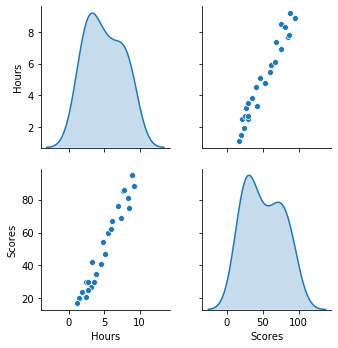

In [8]:
# Let's now visualise our data using seaborn. We'll first make a pairplot of all the variables...
sns.pairplot(Student_data,diag_kind="kde")

**Hours seems to be most correlated with Scores. So let's go ahead and perform simple linear regression using Hours as our feature variable.**

### Train-Test Split

In [9]:
X = Student_data["Hours"].values
y =Student_data["Scores"].values

In [10]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.3, random_state=101) 

In [11]:
X_train=X_train.reshape(-1,1)
X_test=X_test.reshape(-1,1)

### Creating and Training the Model

In [12]:
from sklearn.linear_model import LinearRegression  
model= LinearRegression()  
model.fit(X_train, y_train) 

print("Training complete.")

Training complete.


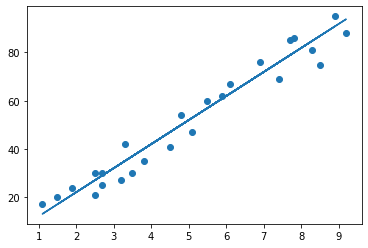

In [13]:
line = model.coef_*X+model.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

### Predictions

In [14]:
print(X_test) # Testing data - In Hours
y_pred = model.predict(X_test) # Predicting the scores

[[2.5]
 [7.7]
 [3.8]
 [7.4]
 [5.5]
 [4.8]
 [3.2]
 [8.5]]


In [15]:
print("Compraing Actual Scores and Predicted Scores")
compare_df = pd.DataFrame({'Actual Scores': y_test, 'Predicted Scores': y_pred})  
compare_df

Compraing Actual Scores and Predicted Scores


,Actual Scores,Predicted Scores
0,30,27.018782
1,85,78.844662
2,35,39.975252
3,69,75.854708
4,60,56.918328
5,54,49.941767
6,27,33.995343
7,75,86.817875


### Residual Analysis

Text(0.5, 0, 'Errors')

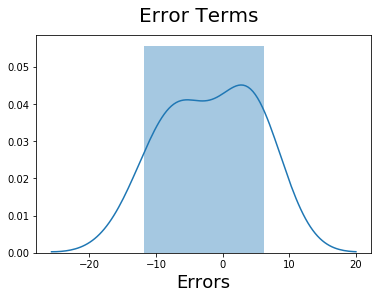

In [16]:
fig = plt.figure()
sns.distplot((y_test - y_pred),)
fig.suptitle('Error Terms', fontsize = 20)               
plt.xlabel('Errors', fontsize = 18)

**Errors are normally distributed**

### Evaluating the model
#### R2_Score

In [17]:
from sklearn import metrics
print('R2 Score:',metrics.r2_score(y_test, y_pred))

R2 Score: 0.8999124290533055


### Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [18]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 5.864954643694258
MSE: 41.63486564552886
RMSE: 6.452508476982333


## Test with your own data

In [19]:
hours =9.25
own_pred = model.predict(np.array(hours).reshape(-1,1))
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 94.29276125536512
